## 1. What is our independent variable? What is our dependent variable?

Independent Variable: Color of Ink
Dependent Variable: Time in seconds to read through list of words



## 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

$\mu $<sub> 1 </sub>: the average time in seconds taken to read through congruent words list

$\mu $<sub> 2 </sub>: the average time in seconds taken to read through incongruent words list    
 
H<sub>0</sub>: Null Hypothesis: $\mu $<sub> 1 </sub> = $\mu $<sub> 2 </sub>

H<sub>a</sub>: Alternative Hypothesis: $\mu $<sub> 1 </sub> $\neq$ $\mu $<sub> 2 </sub>


The paired sample T-Test will be used to test the Null Hypothesis. This method is ideal because the data was collected by having each single participant be tested 2 seperate times, with all things be consistent except for the change in the independent value. this will allow us to compare the difference in the results and make comparisions.

This will require calculating the mean and standard deviations for the results of the congruent words sample and the incongruent words sample. Then with these statistics we can the the paired sample T-test to derive a p-value.

#### My personal test results
I took the test just for fun and these are my results. 

<strong> Congruent Results: </strong> 13.532 seconds

<strong> Incongruent Results: </strong> 23.815 seconds

My results show that my test scores are different, however this cannot be used to make any type of inference about the population. To do that, we need to use a bigger sample and run an analysis using the T-test.

#### Data used for our Analysis
the data provided by udacity will be imported to provided a datasframe of the test results of 24 particpants. this dataframe will be used for our analysis

In [1]:
# import necessary libarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
from scipy.stats import norm, ttest_ind, stats, t

# import data from csv file
df = pd.read_csv(r"C:\\Users\\rstau\\OneDrive\\Documents\\data_analysis\\stroopdata.csv")
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


#### Data wrangling

In order to do a pair sample T-test we need to calculate a the difference between each participants congruent and Incongruent test results

In [2]:
for x in df:
    diff = df['Incongruent'] - df['Congruent']
    
diff

0      7.199
1      1.950
2     11.650
3      7.057
4      8.134
5      8.640
6      9.880
7      8.407
8     11.361
9     11.802
10     2.196
11     3.346
12     2.437
13     3.401
14    17.055
15    10.028
16     6.644
17     9.790
18     6.081
19    21.919
20    10.950
21     3.727
22     2.348
23     5.153
dtype: float64

## 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [3]:
# this is creating a table of statistics that we are calculating so that it is in a easy to read format
# (resource 1. creating a dataframe table)

statistics = [(df['Congruent'].mean(), df['Congruent'].std())
             ,(df['Incongruent'].mean(), df['Incongruent'].std())
             ,(diff.mean(), diff.std())]

table = pd.DataFrame(statistics, columns = ['mean', 'standard deviation'],index = ['Congruent', 'Incongruent', 'Difference'])
table

,mean,standard deviation
Congruent,14.051125,3.559358
Incongruent,22.015917,4.797057
Difference,7.964792,4.864827


## 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

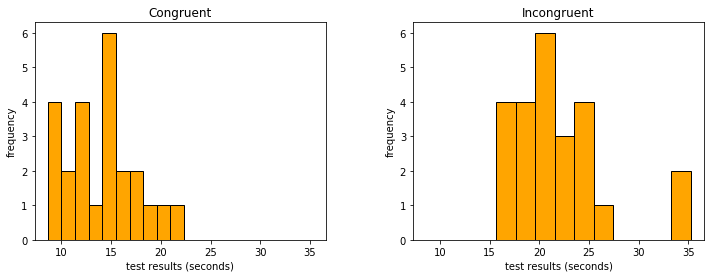

In [4]:
#creating and labeling a histogram (resource 2: creating and labeling a historgram:)
ax = df.hist(grid=False, bins=10, figsize=(12,4),color = 'orange', edgecolor= 'black', sharex=True)

ax = ax[0]
for x in ax:
        
        x.set_xlabel('test results (seconds)')
        x.set_ylabel('frequency')

### Observations
My observations about that shows that both the histograms are somewhat normally distributed. This allows us to continue using the T-Test analysis.

The congruent test score on the left have the majority of their data <= 20 seconds. The Incongruent data on the right shows the data is mostly >= 20 seconds.

## 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

### The formulas for the T statistic and the Standard Error

### $T$ = $\frac{\bar{d}}{SE(d)}$

### $SE(d)$ = $\frac{std(d)}{\sqrt{n}}$

In [5]:
#just bringing up the statistics that we calculated earlier
table

,mean,standard deviation
Congruent,14.051125,3.559358
Incongruent,22.015917,4.797057
Difference,7.964792,4.864827


In [6]:
#Calculate Standard error of the differences
SE = diff.std() / math.sqrt(diff.count())

#calculates the T-score and prints
T = diff.mean() / SE
print('T-statistic = %6.3f' % T)

#calculates the P-value and prints (rescource: 3. scipy functions to calculate p-value)
pval = t.sf(T, (diff.count()-1))
print('P-value = %6.9f' % pval)

T-statistic =  8.021
P-value = 0.000000021


# Conclusion
The P-value for this analysis is essential 0. This P-value tells us that we reject the Null Hypothesis that says there is no difference between the Congruent test and the incongruent test. We can feel confident in saying that the Incongruent test is in fact more time consuming to complete. 

##### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!
This test does not tell us what is the factor that causes the Incongruent test to be slower, but If I were to guess it is because the mind has a hard time saying a word differently from what they are reading. Similar tasks that would have the similar effect could be speaking out loud if a font is "big" or "small" but the actually text is the opposite. 

# Resources:

1. creating a dataframe table: https://thispointer.com/python-pandas-how-to-add-rows-in-a-dataframe-using-dataframe-append-loc-iloc/
2. creating and labeling a historgram: https://mode.com/example-gallery/python_histogram/
3. scipy functions to calculate p-value: https://stackoverflow.com/questions/17559897/python-p-value-from-t-statistic